In [1]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm

In [2]:
df=pd.read_csv('C:/Users/devil/Desktop/thesis/diabeties/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df=pd.read_csv('C:/Users/devil/Desktop/thesis/parkinsons.data')
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
features=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]
labels=df.loc[:,'Outcome'].values

In [3]:
features=df.loc[:,df.columns!='Outcome'].values[:,1:]
labels=df.loc[:,'Outcome'].values

KeyError: 'status'

In [5]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
features.shape,labels.shape

((768, 7), (768,))

In [7]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

268 500


In [7]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [6]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

## k-fold cross validation

## xgboost

In [12]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.734 (0.063)


In [14]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.749 (0.066)


## random forest

In [15]:
clf2 = svm.SVC(kernel='linear')

In [16]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf2, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.767 (0.049)


## SVM

In [19]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [20]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.741 (0.044)


## KNN

## repeted k-fold cross validation

>1 mean=0.7343 se=0.021
>2 mean=0.7259 se=0.014
>3 mean=0.7240 se=0.010
>4 mean=0.7263 se=0.008
>5 mean=0.7263 se=0.006
>6 mean=0.7270 se=0.006
>7 mean=0.7288 se=0.005
>8 mean=0.7287 se=0.005
>9 mean=0.7295 se=0.005
>10 mean=0.7275 se=0.005
>11 mean=0.7254 se=0.005
>12 mean=0.7262 se=0.004
>13 mean=0.7255 se=0.004
>14 mean=0.7258 se=0.004
>15 mean=0.7244 se=0.004


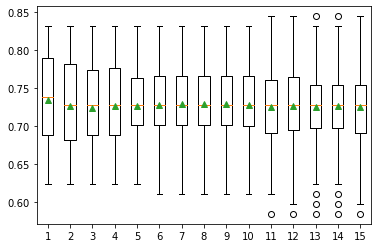

In [25]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(x, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [24]:
model=XGBClassifier()

## random forest

>1 mean=0.7486 se=0.022
>2 mean=0.7499 se=0.013
>3 mean=0.7496 se=0.010
>4 mean=0.7458 se=0.008
>5 mean=0.7471 se=0.007
>6 mean=0.7452 se=0.006
>7 mean=0.7454 se=0.006
>8 mean=0.7468 se=0.005
>9 mean=0.7461 se=0.005
>10 mean=0.7451 se=0.004
>11 mean=0.7445 se=0.005
>12 mean=0.7443 se=0.004
>13 mean=0.7441 se=0.004
>14 mean=0.7440 se=0.004
>15 mean=0.7436 se=0.004


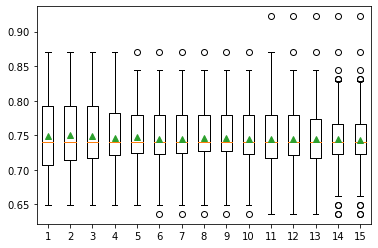

In [26]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# evaluate model
	scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(x, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

## svm

>1 mean=0.7669 se=0.016
>2 mean=0.7669 se=0.010
>3 mean=0.7669 se=0.009
>4 mean=0.7663 se=0.008
>5 mean=0.7669 se=0.007
>6 mean=0.7672 se=0.006
>7 mean=0.7675 se=0.005
>8 mean=0.7682 se=0.005
>9 mean=0.7681 se=0.005
>10 mean=0.7681 se=0.005
>11 mean=0.7679 se=0.005
>12 mean=0.7676 se=0.004
>13 mean=0.7674 se=0.004
>14 mean=0.7674 se=0.004
>15 mean=0.7677 se=0.004


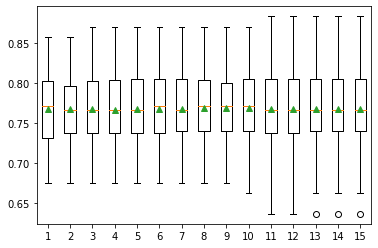

In [27]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# evaluate model
	scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(x, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

## KNN

>1 mean=0.7408 se=0.015
>2 mean=0.7402 se=0.010
>3 mean=0.7370 se=0.007
>4 mean=0.7356 se=0.006
>5 mean=0.7364 se=0.006
>6 mean=0.7352 se=0.005
>7 mean=0.7349 se=0.005
>8 mean=0.7345 se=0.005
>9 mean=0.7350 se=0.005
>10 mean=0.7358 se=0.004
>11 mean=0.7353 se=0.004
>12 mean=0.7347 se=0.004
>13 mean=0.7348 se=0.004
>14 mean=0.7337 se=0.004
>15 mean=0.7336 se=0.004


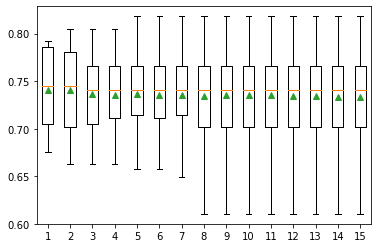

In [28]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# evaluate model
	scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(x, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [429]:
print(type(x))

<class 'numpy.ndarray'>


In [3]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

NameError: name 'x' is not defined

In [6]:
x_train_pd=pd.DataFrame(x_train)
x_test_pd=pd.DataFrame(x_test)

In [10]:
x_train_pd.columns

RangeIndex(start=0, stop=7, step=1)

In [11]:
x_train.shape, x_test.shape

((614, 7), (154, 7))

## normalization of data

In [7]:
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
X_test_norm = norm.transform(x_test)

## feature selection filtering method

In [8]:
from sklearn.feature_selection import VarianceThreshold

In [9]:
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train_norm)


VarianceThreshold(threshold=0.01)

In [10]:
constant_filter.get_support().sum()

7

In [11]:
constant_list=[not temp for temp in constant_filter.get_support()]
constant_list

[False, False, False, False, False, False, False]

In [12]:
x_train_filter=constant_filter.transform(X_train_norm)
x_test_filter=constant_filter.transform(X_test_norm)

In [13]:
x_train_filter.shape,x_test_filter.shape,x_train.shape

((614, 7), (154, 7), (614, 7))

### no constant features are there

### quasi constant removal

In [14]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(x_train_filter)
VarianceThreshold(threshold=0.01)

VarianceThreshold(threshold=0.01)

In [15]:
quasi_constant_filter.get_support().sum()

7

### 0 features are quasi constant

In [16]:
x_train_quasi_filter = quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)
x_train_quasi_filter.shape, x_test_quasi_filter.shape

((614, 7), (154, 7))

### removing duplicate features

In [17]:
X_train_T = x_train_quasi_filter.T
X_test_T = x_test_quasi_filter.T
type(X_train_T)


numpy.ndarray

In [18]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [19]:
X_train_T.shape, X_test_T.shape

((7, 614), (7, 154))

In [1]:
X_train_T.duplicated().sum()

NameError: name 'X_train_T' is not defined

### there are 0 duplicate features

In [21]:
duplicated_features = X_train_T.duplicated()
duplicated_features

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [22]:
features_to_keep = [not index for index in duplicated_features]

In [23]:
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [24]:
X_train_unique.shape, x_train.shape

((614, 7), (614, 7))

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

In [29]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [101]:
%%time
run_randomForest(X_train_unique, X_test_unique, y_train, y_test)

Accuracy on test set: 
0.7792207792207793
Wall time: 151 ms


In [25]:
x_train_T=x_train_filter.T
x_test_T=x_test_filter.T

In [26]:
x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

In [27]:
x_train_T.duplicated().sum()

0

In [28]:
duplicated_features=x_train_T.duplicated()

In [29]:
features_to_keep=[not index for index in duplicated_features]

In [30]:
x_train_unique=x_train_T[features_to_keep].T
x_test_unique=x_test_T[features_to_keep].T

In [31]:
x_train_unique.shape,x_test_unique.shape

((614, 7), (154, 7))

In [32]:
from sklearn.feature_selection import mutual_info_classif

In [33]:
mi=mutual_info_classif(x_train_unique,y_train)

In [40]:
len(mi)

7

In [34]:
mi

array([0.        , 0.12293896, 0.        , 0.02225162, 0.045811  ,
       0.06193035, 0.01599897])

In [35]:
mi=pd.Series(mi)
mi.index=x_train_unique.columns

In [36]:
mi.sort_values(ascending=False,inplace=True)

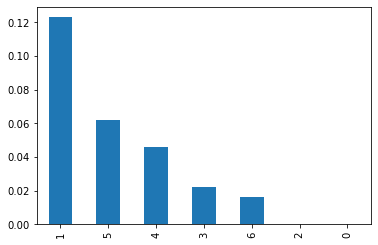

In [37]:
mi.plot.bar()

In [38]:
from sklearn.feature_selection import SelectPercentile, chi2

In [39]:
sel=SelectPercentile(mutual_info_classif,percentile=70).fit(x_train_unique,y_train)
x_train_unique.columns[sel.get_support()]

Int64Index([0, 1, 4, 5, 6], dtype='int64')

In [87]:
x_train_mi=sel.transform(x_train_unique)
x_test_mi=sel.transform(x_test_unique)

In [11]:
model=XGBClassifier()

In [100]:
x_train_mi.shape

(614, 7)

In [10]:
model=XGBClassifier()
model.fit(x_train_mi,y_train)

NameError: name 'x_train_mi' is not defined

In [39]:

y_pred=model.predict(x_test_mi)
print(accuracy_score(y_test, y_pred)*100)

69.26406926406926


In [40]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [41]:
clf.fit(x_train_mi,y_train)

RandomForestClassifier()

In [42]:
y_pred=clf.predict(x_test_mi)

In [43]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 70.995670995671


In [61]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train_mi, y_train)
clf.fit(x_train_mi, y_train)
y_pred = clf.predict(x_test_mi)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 77.92207792207793


In [55]:
clf.fit(x_train_mi, y_train)

SVC(kernel='linear')

In [56]:
y_pred = clf.predict(x_test_mi)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 75.32467532467533


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_mi, y_train)

KNeighborsClassifier()

In [51]:
y_pred=classifier.predict(x_test_mi)
print(accuracy_score(y_test, y_pred)*100)

71.42857142857143


## removing corellation from feature

In [159]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

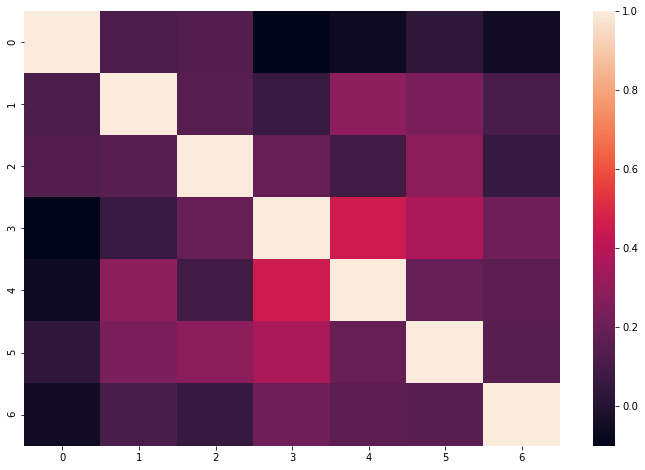

In [160]:
corrmat = X_train_unique.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [161]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [162]:
corr_features=get_correlation(x_train_unique,0.85)
corr_features

set()

### list of feature which are corellated

In [163]:
len(corr_features)

0

In [164]:
x_train_uncorr=x_train_unique.drop(labels=corr_features,axis=1)
x_test_uncorr=x_test_unique.drop(labels=corr_features,axis=1)

In [165]:
x_train_uncorr.shape,x_test_uncorr.shape

((614, 7), (154, 7))

In [93]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [241]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_uncorr, y_train)

KNeighborsClassifier()

In [242]:
%%time
y_pred=classifier.predict(x_test_uncorr)
print(accuracy_score(y_test, y_pred)*100)

97.43589743589743
Wall time: 115 ms


In [94]:
clf.fit(x_train_uncorr,y_train)

RandomForestClassifier()

In [95]:
y_pred=clf.predict(x_test_uncorr)

In [96]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 94.87179487179486


In [162]:
model=XGBClassifier()
model.fit(x_train_uncorr,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
y_pred=model.predict(x_test_uncorr)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [164]:
clf = svm.SVC(kernel='linear')

In [166]:
clf.fit(x_train_uncorr, y_train)

SVC(kernel='linear')

In [167]:
y_pred = clf.predict(x_test_uncorr)

In [168]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 89.74358974358975


### feature selection ANOVA test

In [16]:
sel = f_classif(x_train_unique,y_train)
sel

(array([22.18646951,  7.03959804, 31.32452834, 13.50563993, 20.91608813,
        12.66554178, 14.9971758 , 12.66396875, 28.52453178, 25.66773585,
        26.14627249, 25.5250739 , 25.5280625 , 26.14738258,  6.5938288 ,
        29.7097509 , 16.13887342,  7.73722261, 71.75668331, 36.85198098,
        20.51123905, 60.25400829]),
 array([5.48362715e-06, 8.80866843e-03, 9.74996547e-08, 3.27836652e-04,
        9.80222057e-06, 4.95527505e-04, 1.58781911e-04, 4.95912636e-04,
        3.26559992e-07, 1.14698935e-06, 9.27762332e-07, 1.22202863e-06,
        1.22040661e-06, 9.27306665e-07, 1.11848225e-02, 1.95255014e-07,
        9.17809191e-05, 6.08566220e-03, 1.81696808e-14, 9.53002582e-09,
        1.18092456e-05, 1.08059630e-12]))

In [17]:
p_values= pd.Series(sel[1])
p_values.index=x_train_unique.columns
p_values.sort_values(ascending=True,inplace=True)

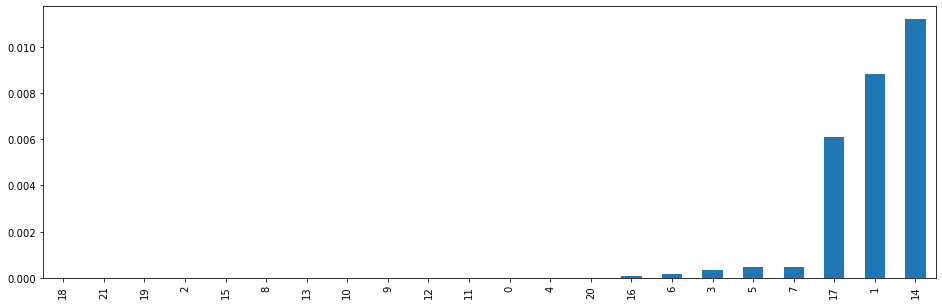

In [19]:
p_values.plot.bar(figsize= (16,5))

In [22]:
p_values=p_values[p_values<0.05]

In [23]:
p_values.index

Int64Index([18, 21, 19, 2, 15, 8, 13, 10, 9, 12, 11, 0, 4, 20, 16, 6, 3, 5, 7,
            17, 1, 14],
           dtype='int64')

In [24]:
x_train_p=x_train_unique[p_values.index]
x_test_p=x_test_unique[p_values.index]

In [11]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_norm,y_train)

KNeighborsClassifier()

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
%%time
y_pred=classifier.predict(X_test_norm)
print(accuracy_score(y_test, y_pred)*100)

97.43589743589743
Wall time: 769 ms


## XGBoost classifier

In [19]:
model=XGBClassifier()

In [317]:
#DataFlair - Train the model
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [318]:

y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [9]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

## recursive feature elimination

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from xgboost import XGBClassifier

In [14]:
def run_randomForest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [15]:
def run_SVM(x_train, x_test, y_train, y_test):
    clf = svm.SVC(kernel='linear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [16]:
def run_XGB(x_train, x_test, y_train, y_test):
    clf = XGBClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [17]:
def run_kneighbor(x_train, x_test, y_train, y_test):
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [222]:
sel = RFE(svm.SVC(kernel='linear'), n_features_to_select = 6)
sel.fit(x_train, y_train)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=6)

In [210]:
sel = RFE(XGBClassifier(), n_features_to_select = 7)
sel.fit(x_train, y_train)

RFE(estimator=XGBClassifier(base_score=None, booster=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, gamma=None, gpu_id=None,
                            importance_type='gain',
                            interaction_constraints=None, learning_rate=None,
                            max_delta_step=None, max_depth=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=None, num_parallel_tree=None,
                            random_state=None, reg_alpha=None, reg_lambda=None,
                            scale_pos_weight=None, subsample=None,
                            tree_method=None, validate_parameters=None,
                            verbosity=None),
    n_features_to_select=7)

In [232]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 7)
sel.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=7)

In [206]:
sel.get_support()

array([ True,  True, False, False,  True,  True,  True])

In [233]:
selected_feat= x_train_pd.columns[(sel.get_support())]
selected_feat

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [176]:
len(selected_feat)

7

In [234]:
X_train_rfe = sel.transform(x_train)
X_test_rfe = sel.transform(x_test)

In [203]:
%%time
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.7142857142857143
Wall time: 149 ms


In [179]:
%%time
run_randomForest(x_train, x_test, y_train, y_test)

Accuracy:  0.7857142857142857
Wall time: 150 ms


In [213]:
%%time
run_XGB(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.7467532467532467
Wall time: 250 ms


In [225]:
%%time
run_SVM(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.7922077922077922
Wall time: 8.93 ms


## Feature selection by GradientBoost Tree Importance

In [228]:
from sklearn.ensemble import GradientBoostingClassifier

In [309]:
sel = RFE(classifier, n_features_to_select = 22)
sel.fit(x_train, y_train)

RFE(estimator=KNeighborsClassifier(), n_features_to_select=22)

In [310]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [313]:
features = x_train_pd.columns[sel.get_support()]
features

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21],
           dtype='int64')

In [314]:
len(features)

22

In [315]:
X_train_rfe = sel.transform(x_train)
X_test_rfe = sel.transform(x_test)

In [316]:
%%time
run_kneighbor(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9743589743589743
Wall time: 8.16 ms


In [29]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [44]:
%%time
run_randomForest(x_train, x_test, y_train, y_test)

Accuracy:  0.9230769230769231
Wall time: 396 ms


In [30]:
for index in range(1, 8):
    sel = RFE(classifier, n_features_to_select = index)
    sel.fit(X_train_norm, y_train)
    X_train_rfe = sel.transform(X_train_norm)
    X_test_rfe = sel.transform(X_test_norm)
    print('Selected Feature: ', index)
    run_kneighbor(X_train_rfe, X_test_rfe, y_train, y_test)
    print()

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [148]:
    sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = 9)
    sel.fit(x_train, y_train)
    X_train_rfe = sel.transform(x_train)
    X_test_rfe = sel.transform(x_test)
    print('Selected Feature: ', 9)
    run_XGB(X_train_rfe, X_test_rfe, y_train, y_test)
    print()

Selected Feature:  9
Accuracy:  0.9743589743589743



In [231]:
X_train_rfe.shape

(614, 6)

In [55]:
sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select = 14)
sel.fit(x_train, y_train)
X_train_rfe = sel.transform(x_train)
X_test_rfe = sel.transform(x_test)
print('Selected Feature: ', 14)
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)
print()

Selected Feature:  14
Accuracy:  0.9487179487179487



In [51]:
features = x_train_pd.columns[sel.get_support()]
features

Int64Index([0, 1, 7, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21], dtype='int64')

In [270]:
for index in range(1, 8):
    sel = RFE(XGBClassifier(), n_features_to_select = index)
    sel.fit(x_train, y_train)
    X_train_rfe = sel.transform(x_train)
    X_test_rfe = sel.transform(x_test)
    print('Selected Feature: ', index)
    run_XGB(X_train_rfe, X_test_rfe, y_train, y_test)
    print()

Selected Feature:  1
Accuracy:  0.7012987012987013

Selected Feature:  2
Accuracy:  0.7207792207792207

Selected Feature:  3
Accuracy:  0.7662337662337663

Selected Feature:  4
Accuracy:  0.7532467532467533

Selected Feature:  5
Accuracy:  0.7337662337662337

Selected Feature:  6
Accuracy:  0.7207792207792207

Selected Feature:  7
Accuracy:  0.7467532467532467



In [273]:
    sel = RFE(XGBClassifier(), n_features_to_select = 3)
    sel.fit(x_train, y_train)
    X_train_rfe = sel.transform(x_train)
    X_test_rfe = sel.transform(x_test)
    print('Selected Feature: ', 19)
    run_XGB(X_train_rfe, X_test_rfe, y_train, y_test)
    print()

Selected Feature:  19
Accuracy:  0.7662337662337663



In [392]:
X_train_rfe.shape

(156, 19)

In [345]:
features = x_train_pd.columns[sel.get_support()]
features

Int64Index([0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20,
            21],
           dtype='int64')

In [347]:
x_train_pd.shape

(156, 22)

In [348]:
features.shape

(19,)

In [94]:
rfe = RFE(estimator=XGBClassifier(), n_features_to_select=14)
model = XGBClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.849 (0.154)


In [44]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.859 (0.153)


## SVM method

In [25]:
clf2 = svm.SVC(kernel='linear')

In [239]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [240]:
y_pred = clf.predict(x_test)

In [241]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.22077922077922


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [244]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

In [245]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [322]:
y_pred=clf.predict(x_test)

In [323]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 92.3076923076923


## nural network

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Conv2D, Flatten
import time

In [22]:
model = keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, input_shape=[7], activation='relu'),        #28*28=784 pixel,one image
    keras.layers.Dense(10, activation='softmax')
])

In [248]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


In [249]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [250]:
model.fit(X_train_rfe, y_train, epochs=22)

Epoch 1/22
20/20 [==============================] - 0s 3ms/step - loss: 2.0853 - accuracy: 0.3925
Epoch 2/22
20/20 [==============================] - 0s 698us/step - loss: 1.5067 - accuracy: 0.6775
Epoch 3/22
20/20 [==============================] - 0s 848us/step - loss: 0.9974 - accuracy: 0.6694
Epoch 4/22
20/20 [==============================] - 0s 698us/step - loss: 0.7200 - accuracy: 0.6889
Epoch 5/22
20/20 [==============================] - 0s 698us/step - loss: 0.6133 - accuracy: 0.7296
Epoch 6/22
20/20 [==============================] - 0s 748us/step - loss: 0.5674 - accuracy: 0.7394
Epoch 7/22
20/20 [==============================] - 0s 698us/step - loss: 0.5373 - accuracy: 0.7671
Epoch 8/22
20/20 [==============================] - 0s 848us/step - loss: 0.5199 - accuracy: 0.7671
Epoch 9/22
20/20 [==============================] - 0s 798us/step - loss: 0.5082 - accuracy: 0.7638
Epoch 10/22
20/20 [==============================] - 0s 698us/step - loss: 0.5047 - accuracy: 0.7606
E

In [30]:
test_loss, test_acc = model.evaluate(X_test_norm, y_test, verbose=2)

2/2 - 0s - loss: 0.2915 - accuracy: 0.8974


## KNN

In [11]:
%%time
y_pred=classifier.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

97.43589743589743
Wall time: 91.3 ms


## performence calculation

In [300]:
pred=classifier.predict(x_test_pd.values)

In [288]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(x_train_mi, y_train)

SVC(kernel='linear')

In [253]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train_mi,y_train)


RandomForestClassifier()

In [423]:
x_test_pd.shape

(39, 9)

In [277]:
model2=XGBClassifier()
model2.fit(X_train_rfe,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [425]:
x_test_pd.shape

(39, 9)

In [403]:
classifier2 = KNeighborsClassifier(n_neighbors=5)

In [405]:
classifier2.fit(X_train_rfe, y_train)

KNeighborsClassifier()

In [289]:
x_train_pd=pd.DataFrame(x_train_mi)
x_test_pd=pd.DataFrame(x_test_mi)

In [275]:
x_train.shape

(614, 7)

In [258]:
x_test.shape

(154, 7)

In [276]:
x_test_pd.shape

(154, 3)

In [298]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [299]:
classifier.fit(x_train_mi, y_train)

KNeighborsClassifier()

In [301]:
pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [260]:
from sklearn.metrics import accuracy_score

In [302]:
accuracy_score(y_test,pred)

0.7662337662337663

In [262]:
from sklearn.metrics import confusion_matrix

In [303]:
cm=confusion_matrix(y_test,pred)

In [304]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(cm)

[[84 13]
 [23 34]]


In [16]:
TN=133

In [22]:
FP=25

In [19]:
FN=28

In [20]:
TP=44

In [23]:
print('Model accuracy= {}'.format((TP+TN)/(TN+TP+FN+FP)))

Model accuracy= 0.7695652173913043


In [24]:
print('Model sensitivity= {}'.format((TP)/(TP+FN)))

Model sensitivity= 0.6111111111111112


In [25]:
print('Model Specificity= {}'.format((TN)/(TN+FP)))

Model Specificity= 0.8417721518987342


In [8]:
from sklearn.metrics import roc_auc_score

In [307]:
roc_auc_score(y_test,pred)

0.7312353047567373

In [ ]:
8

In [18]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.97      1.00      0.98        32

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39

